<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import sys
sys.path.append('Script')
import functions
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 12]

In [2]:
output_path = '../Data/Social-Events'
excel_lst = functions.list_file(output_path,extension='xlsx')
excel_lst

['../Data/Social-Events\\Arts.xlsx',
 '../Data/Social-Events\\Beliefs.xlsx',
 '../Data/Social-Events\\Book Clubs.xlsx',
 '../Data/Social-Events\\Career & Business.xlsx',
 '../Data/Social-Events\\Dance.xlsx',
 '../Data/Social-Events\\Family.xlsx',
 '../Data/Social-Events\\Fashion & Beauty.xlsx',
 '../Data/Social-Events\\Film.xlsx',
 '../Data/Social-Events\\Food & Drink.xlsx',
 '../Data/Social-Events\\Health & Wellness.xlsx',
 '../Data/Social-Events\\Hobbies & Crafts.xlsx',
 '../Data/Social-Events\\Language & Culture.xlsx',
 '../Data/Social-Events\\Learning.xlsx',
 '../Data/Social-Events\\LGBTQ.xlsx',
 '../Data/Social-Events\\Movements.xlsx',
 '../Data/Social-Events\\Music.xlsx',
 '../Data/Social-Events\\Outdoors & Adventure.xlsx',
 '../Data/Social-Events\\Pets.xlsx',
 '../Data/Social-Events\\Photography.xlsx',
 '../Data/Social-Events\\Sci-Fi & Games.xlsx',
 '../Data/Social-Events\\Social.xlsx',
 '../Data/Social-Events\\Sports & Fitness.xlsx',
 '../Data/Social-Events\\Tech.xlsx',
 '../Da

In [42]:
import folium,glob

In [4]:
df = pd.read_excel(excel_lst[0])
print(df.shape)

(266, 24)


In [5]:
df.loc[0]

Category                                                        Arts
Group                                             Art With Intention
Name                               Beginners Salsa /Bachata Classes!
POI                                             2801 Forest Ridge Dr
Place                             2801 Forest Ridge Dr · Bedford, TX
URL                https://www.meetup.com/stepup/events/msdlnrybc...
Host By                                      Kane (My Salsa Dance S.
Address                                              Bedford, TX, us
Description        Mon, Mar 9, 2020, 7:00 PM: Hi Friends,New Clas...
Key Words          Musicians,Artists,Performing Arts,Models,Songw...
Hold Date                    Monday, March 9, 20207:00 PM to 9:00 PM
Cover_Photo        https://secure.meetupstatic.com/photos/event/c...
Google Map         https://www.google.com/maps/search/?api=1&quer...
Detail             Hi Friends,\nNew Class Schedule!\nMONDAYS:\nBe...
Lat                               

In [38]:
m = folium.Map(location= [df.loc[0]['Lat'],df.loc[0]['Long']])
for item in df.iloc:
    iframe = folium.IFrame(f'<a style="font-size:11px">Name : { item.Name} <br> POI : { item.POI} <br> Hold Date : { item[10]} <a>',width=250,height=100)
    folium.Marker(
    location=[item['Lat'], item['Long']],
    popup=folium.Popup(iframe,max_width=450),
    ).add_to(m)
m 

In [55]:
from sklearn.cluster import DBSCAN
import numpy as np

DBSCAN
![img](https://files.realpython.com/media/crescent_comparison.7938c8cf29d1.png)

In [43]:
shp_out_path = '../Shapefile/Social-Events'
shp_lst = glob.glob(shp_out_path + '/*.shp')
shp_lst

['../Shapefile/Social-Events\\Arts.shp',
 '../Shapefile/Social-Events\\Beliefs.shp',
 '../Shapefile/Social-Events\\Book Clubs.shp',
 '../Shapefile/Social-Events\\Career & Business.shp',
 '../Shapefile/Social-Events\\Classified_events.shp',
 '../Shapefile/Social-Events\\Dance.shp',
 '../Shapefile/Social-Events\\Family.shp',
 '../Shapefile/Social-Events\\Fashion & Beauty.shp',
 '../Shapefile/Social-Events\\Film.shp',
 '../Shapefile/Social-Events\\Food & Drink.shp',
 '../Shapefile/Social-Events\\Health & Wellness.shp',
 '../Shapefile/Social-Events\\Hobbies & Crafts.shp',
 '../Shapefile/Social-Events\\Language & Culture.shp',
 '../Shapefile/Social-Events\\Learning.shp',
 '../Shapefile/Social-Events\\LGBTQ.shp',
 '../Shapefile/Social-Events\\Movements.shp',
 '../Shapefile/Social-Events\\Music.shp',
 '../Shapefile/Social-Events\\Outdoors & Adventure.shp',
 '../Shapefile/Social-Events\\Pets.shp',
 '../Shapefile/Social-Events\\Photography.shp',
 '../Shapefile/Social-Events\\Sci-Fi & Games.shp'

In [77]:
gdf = gpd.read_file(shp_lst[4])
gdf.head()

,Unnamed_ 0,Category,Group,Name,POI,Place,URL,Host By,Address,Descriptio,...,Long,Date,Start_Time,End_Time,Location,Types,start_ti_1,end_timeRa,weekdays,geometry
0,0,Arts,Art With Intention,Beginners Salsa /Bachata Classes!,2801 Forest Ridge Dr,"2801 Forest Ridge Dr · Bedford, TX",https://www.meetup.com/stepup/events/msdlnrybc...,Kane (My Salsa Dance S.,"Bedford, TX, us","Mon, Mar 9, 2020, 7:00 PM: Hi Friends,New Clas...",...,-97.144920,2020-03-09,7:00 PM,9:00 PM,32.850032806396484;-97.1449203491211,Weekly events,38,42,0,POINT (268149.806 -1344010.431)
1,1,Arts,Art With Intention,Beginners Salsa /Bachata Classes!,2801 Forest Ridge Dr,"2801 Forest Ridge Dr · Bedford, TX",https://www.meetup.com/stepup/events/msdlnrybc...,Kane (My Salsa Dance S.,"Bedford, TX, us","Mon, Mar 16, 2020, 7:00 PM: Hi Friends,New Cla...",...,-97.144920,2020-03-16,7:00 PM,9:00 PM,32.850032806396484;-97.1449203491211,Weekly events,38,42,0,POINT (268149.806 -1344010.431)
2,2,Arts,Art With Intention,Beginners Salsa /Bachata Classes!,2801 Forest Ridge Dr,"2801 Forest Ridge Dr · Bedford, TX",https://www.meetup.com/stepup/events/msdlnrybc...,Kane (My Salsa Dance S.,"Bedford, TX, us","Mon, Mar 23, 2020, 7:00 PM: Hi Friends,New Cla...",...,-97.144920,2020-03-23,7:00 PM,9:00 PM,32.850032806396484;-97.1449203491211,Weekly events,38,42,0,POINT (268149.806 -1344010.431)
3,3,Arts,Art With Intention,Beginners Salsa /Bachata Classes!,2801 Forest Ridge Dr,"2801 Forest Ridge Dr · Bedford, TX",https://www.meetup.com/stepup/events/msdlnrybc...,Kane (My Salsa Dance S.,"Bedford, TX, us","Mon, Mar 30, 2020, 7:00 PM: Hi Friends,New Cla...",...,-97.144920,2020-03-30,7:00 PM,9:00 PM,32.850032806396484;-97.1449203491211,Weekly events,38,42,0,POINT (268149.806 -1344010.431)
4,4,Arts,ArtSpace at Metropolitan Press,Metropolitan Press ArtSpace March Reception: Y...,ArtSpace Metropolitan Press,"1250 Majesty Drive · Dallas, TX",https://www.meetup.com/ArtSpace-at-Metropolita...,Karen T.,"Dallas, TX, us","Thu, Mar 5, 2020, 5:00 PM: Metropolitan?s Marc...",...,-96.876396,2020-03-05,5:00 PM,8:00 PM,32.82609176635742;-96.87639617919922,One Time events,34,40,3,POINT (293442.197 -1345775.544)


In [78]:
arr = []
for point in gdf.geometry:
    cord = [point.x,point.y]
    arr.append(cord)
arr = np.array(arr)

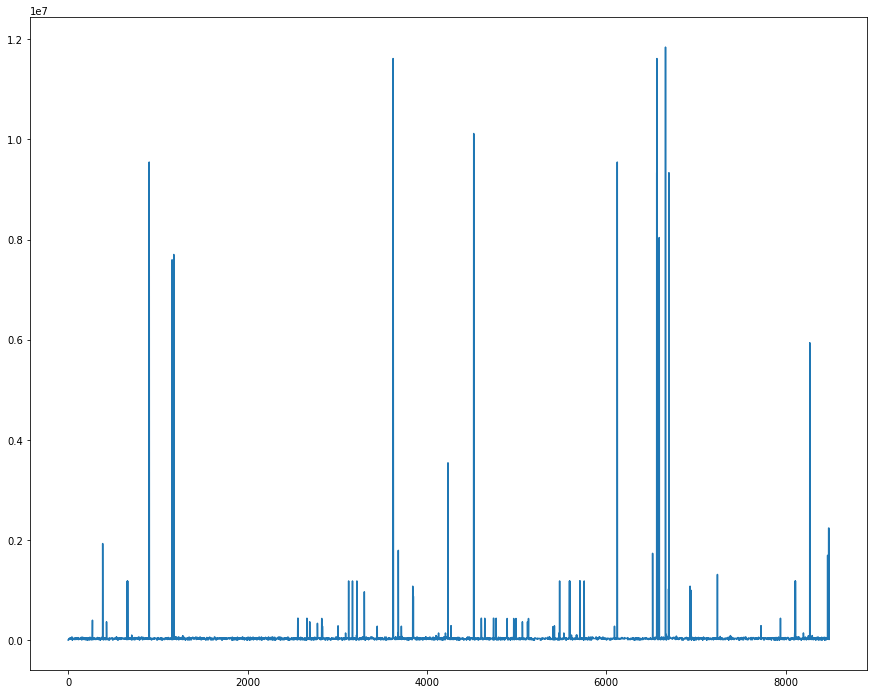

In [79]:
from sklearn.metrics import pairwise_distances
pairwise_distances(arr)
plt.plot(pairwise_distances(arr)[:][0])

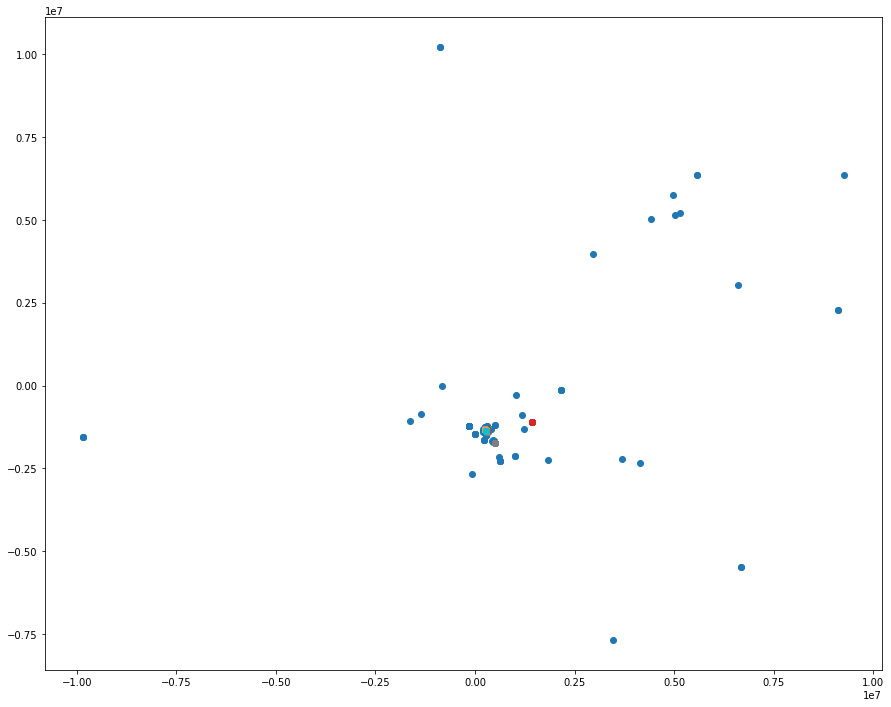

In [80]:
# define the model
model = DBSCAN(eps=3000, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(arr)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(arr[row_ix, 0], arr[row_ix, 1])
# show the plot
plt.show()

In [67]:
row_ix = np.where(yhat == clusters[0])
row_ix

(array([  4,   5,   6,  15,  16,  17,  18,  21,  26,  45,  52,  53,  55,
         57,  65,  73,  85,  86,  87,  93, 124, 171, 191, 240, 242, 244,
        255], dtype=int64),)

K-Means

In [73]:
from sklearn.cluster import KMeans

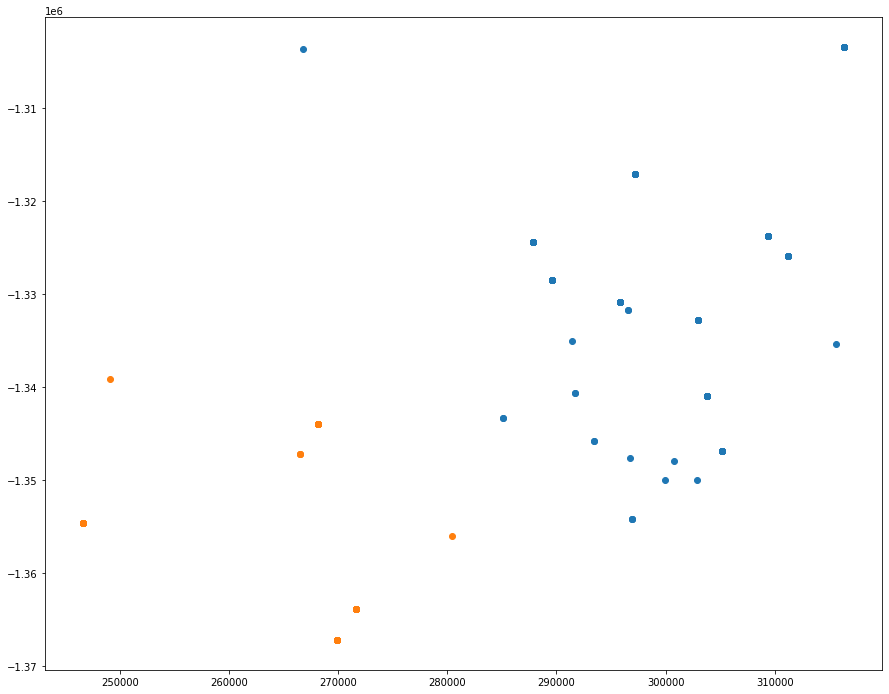

In [76]:
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(arr)
# assign a cluster to each example
yhat = model.predict(arr)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(arr[row_ix, 0], arr[row_ix, 1])
# show the plot
plt.show()